In [2]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
import matplotlib.style as style
style.available
%matplotlib inline
style.use('fivethirtyeight')

In [3]:
def f(x):
    return x**2-4

def df(x):
    return 2*x

def bisect(f,a,b,tol):
    iter = 0
    db = tol*2
    while db>tol:
        m = a+(b-a)/2
        if np.sign(f(a)) == np.sign(f(m)):
            a = m
        else:
            b = m
        iter = iter +1
        db = abs(b-a)
    return m, iter, db

def secant(f,a,b,tol):
    x = []
    x.append(a);
    x.append(b);
    k = 0
    db = 2*tol
    while db>tol:
        k = k+1
        x.append(np.array(x[k]) - (f(np.array(x[k]))*(np.array(x[k])-np.array(x[k-1])))/(f(np.array(x[k]))-f(np.array(x[k-1]))))
        db = abs(np.array(x[k])-np.array(x[k+1]))
    return x[k], k, db

def newton(f,a,tol):
    x = []
    x.append(a);
    k = 0
    db = 2*tol;
    while db >tol:
        x.append(np.array(x[k])-f(np.array(x[k]))/df(np.array(x[k])))
        db = abs(np.array(x[k])-np.array(x[k+1]))
        k = k+1
    return x[k], k, db

def brent(f,a,b,c,tol):
    db = 2*tol;
    iter = 0;
    while (db > tol):
        u = f(b)/f(c)
        v = f(b)/f(a)
        w = f(a)/f(c)
        p = v*(w*(u-w)*(c-b)-(1-u)*(b-a))
        q = (w-1)*(u-1)*(v-1)
        bnew = b + p/q
        db = abs(b-bnew)
        c = a
        a = b
        b = bnew
        iter = iter+1;
    return b, iter, db

In [14]:
a = -10
b = 0.2
c = 1.2
tol = 1e-1
[xbr, iterbr, errbr] = brent(f,a,b,c,tol)

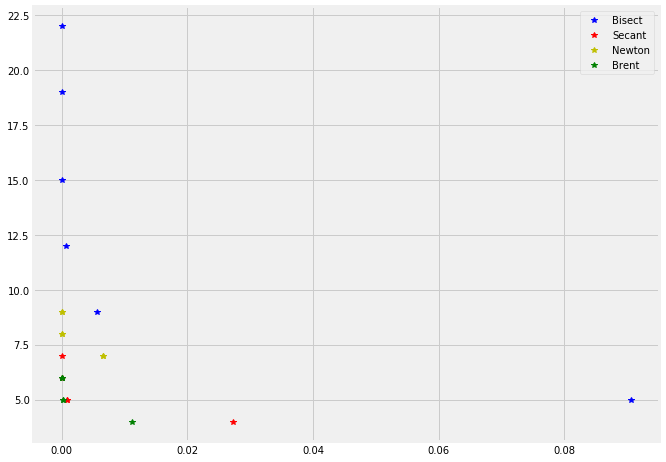

In [15]:
a = 0.1
b = 3
c = 5
tol = 1e-1
tol = np.array([1e-1,1e-2,1e-3,1e-4,1e-5,1e-6]);
fig = plt.figure(figsize=(10,8));
fte_graph = fig.add_subplot(111);
N = np.size(tol)
iterbx=[]
errbx=[]
itersx=[]
errsx=[]
iternx=[]
errnx=[]
iterbrx=[]
errbrx=[]
for index in np.arange(N):
    [xb, iterb, errb] = bisect(f,a,b,tol[index])
    [xs, iters, errs] = secant(f,a,b,tol[index])
    [xn, itern, errn] = newton(f,a,tol[index])
    [xbr, iterbr, errbr] = brent(f,a,b,c,tol[index])
    iterbx.append(iterb);
    errbx.append(errb);
    itersx.append(iters);
    errsx.append(errs);
    iternx.append(itern);
    errnx.append(errn);
    iterbrx.append(iterbr);
    errbrx.append(errbr);
fte_graph.plot(np.array(errbx),np.array(iterbx),'*b',label='Bisect')
fte_graph.plot(np.array(errsx),np.array(itersx),'*r',label='Secant')
fte_graph.plot(np.array(errnx),np.array(iternx),'*y',label='Newton')
fte_graph.plot(np.array(errbrx),np.array(iterbrx),'*g',label='Brent') 
fte_graph.legend()